In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train)

[[ 0.50363664 -1.51368248 -0.46907062 ... -0.80340946 -1.31410638
   1.41209637]
 [-0.6977189   0.34515341 -1.79821474 ... -0.65713496  0.21142007
  -1.38159172]
 [-1.33224459 -1.69582175 -0.79852039 ... -0.43175118 -1.4068079
   0.41934187]
 ...
 [-1.44311529 -1.39557951 -0.87960631 ... -2.23979163 -1.20240545
  -0.99144228]
 [ 0.94686146 -1.73188868  0.91339109 ...  0.06429488 -1.46065958
   1.35108895]
 [ 1.18705115  0.83332305 -0.28231204 ...  0.31912084  0.64395896
  -0.79062399]]


In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 25, 12), max_iter=600, random_state=42)

In [9]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 12), max_iter=600, random_state=42)

In [10]:
y_pred = mlp.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8200


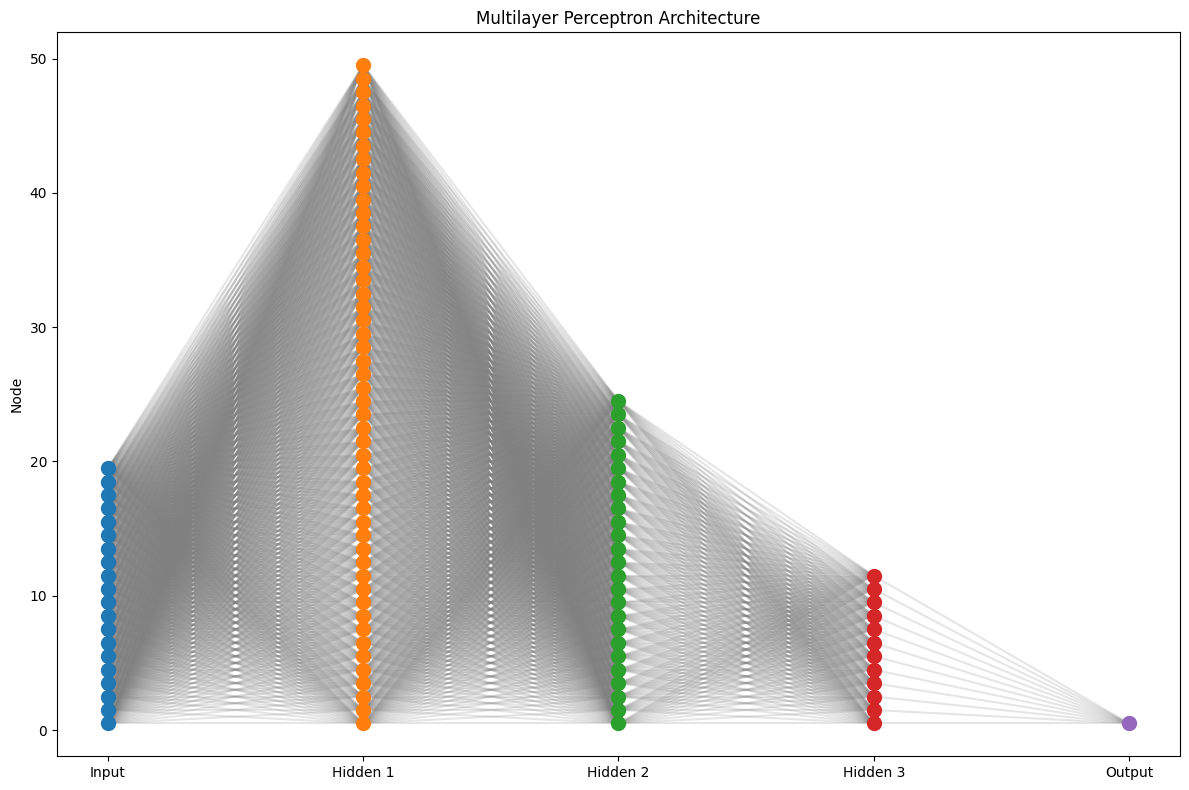

In [13]:
def plot_mlp(mlp):
    # Get the number of layers and their sizes
    layer_sizes = [mlp.n_features_in_] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_nodes = np.arange(layer_size) + 0.5
        ax.scatter([i] * layer_size, layer_nodes, s=100, zorder=4)

    # Plot edges
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.plot([i, i + 1], [j + 0.5, k + 0.5], 'gray', alpha=0.2)

    # Set labels and title
    ax.set_xticks(range(len(layer_sizes)))
    ax.set_xticklabels(['Input'] + [f'Hidden {i+1}' for i in range(len(layer_sizes) - 2)] + ['Output'])
    ax.set_ylabel('Node')
    ax.set_title('Multilayer Perceptron Architecture')

    plt.tight_layout()
    plt.show()

plot_mlp(mlp)